In [1]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

In [3]:
# Load the dataset (assuming it's a CSV file)
df = pd.read_csv(r"C:\Users\Vaishali Senthil\OneDrive\Desktop\FDI_DataSet_Modified.csv")

In [5]:
# Set the 'year' column as the index
df.set_index('year', inplace=True)

In [78]:
# Define the variables of interest
vars_of_interest = [
    ['FDI', 'capital expenditure'],
    ['FDI', 'revenue expenditure'],
    ['govt debt', 'FDI'],
    ['capital expenditure', 'FDI'],
    ['revenue expenditure', 'FDI'],
    ['capital expenditure', 'FDI'] , ['FDI', 'GDP'], ['GDP','FDI',] ]

In [80]:
# Create a function to perform Granger causality tests
def perform_granger_causality_tests(df, vars):
    df_subset = df[vars]
    df_differenced = df_subset.diff().dropna()
    gc_res = grangercausalitytests(df_differenced, 3)
    return gc_res

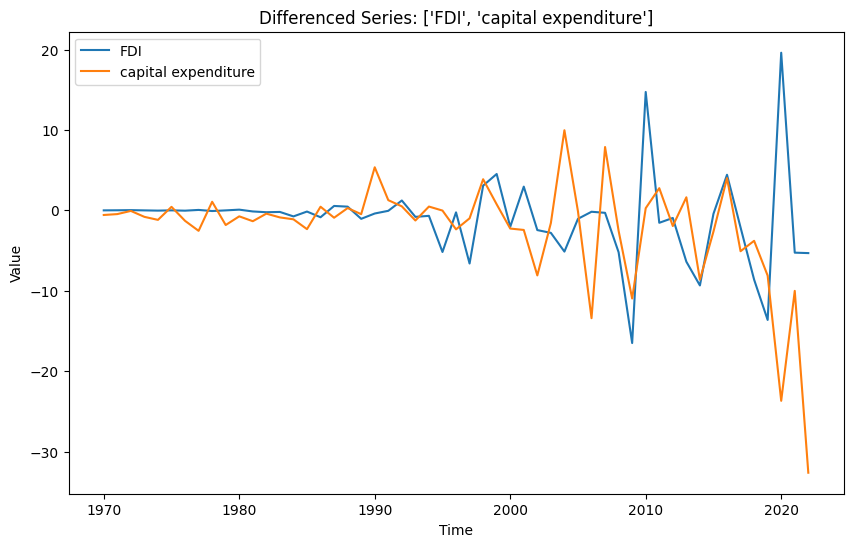

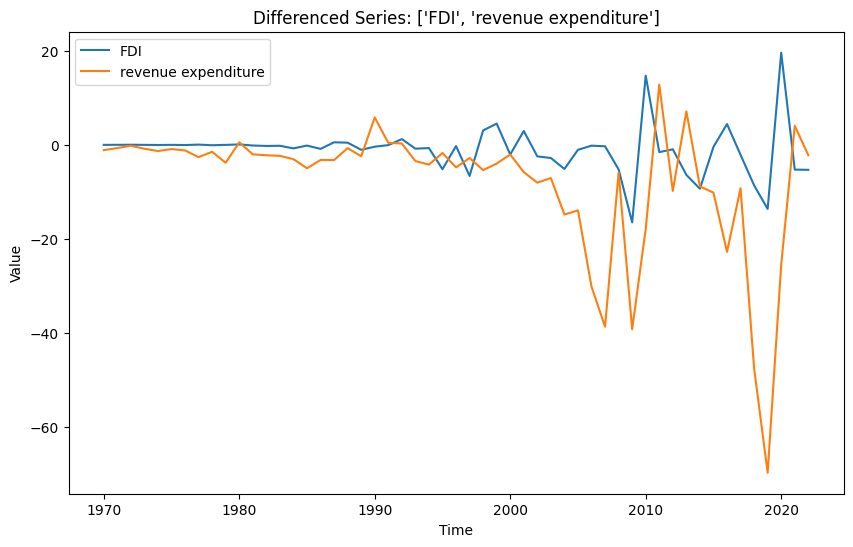

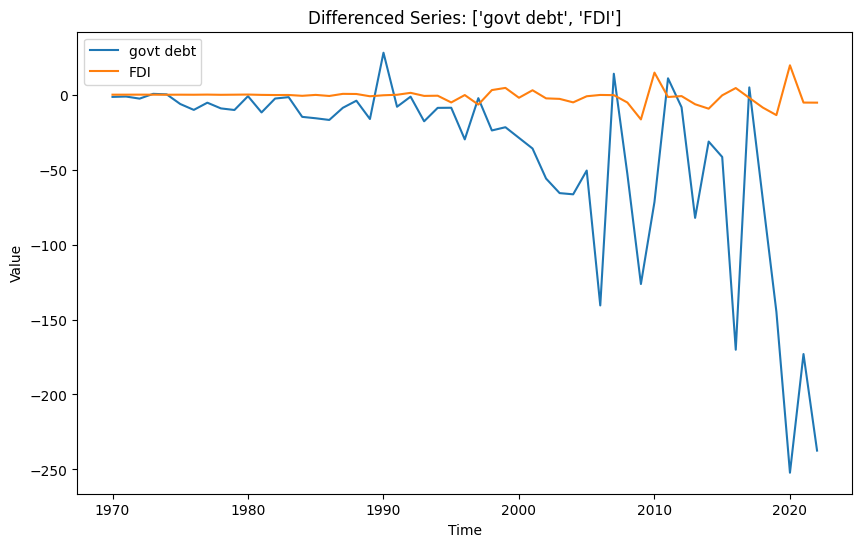

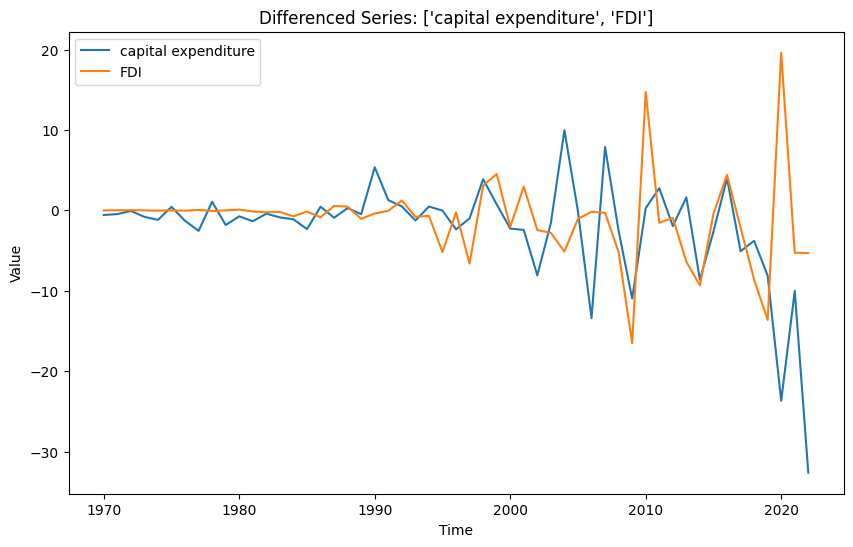

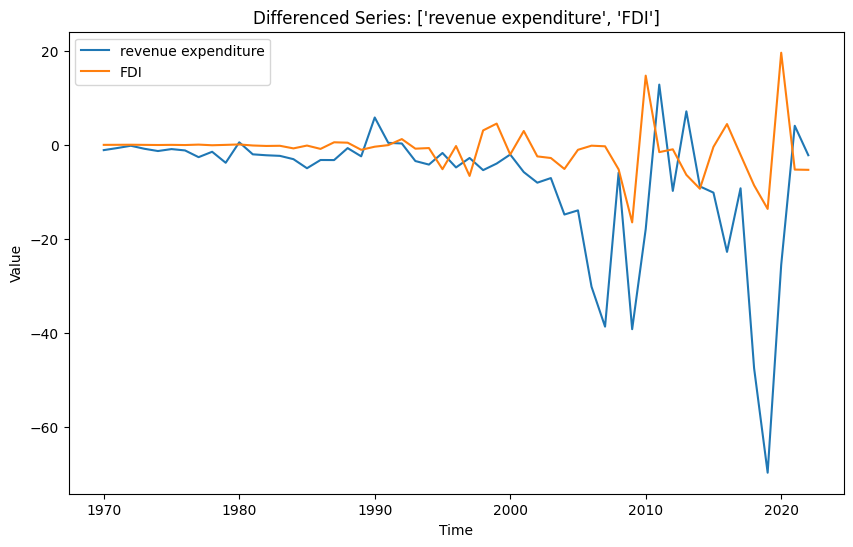

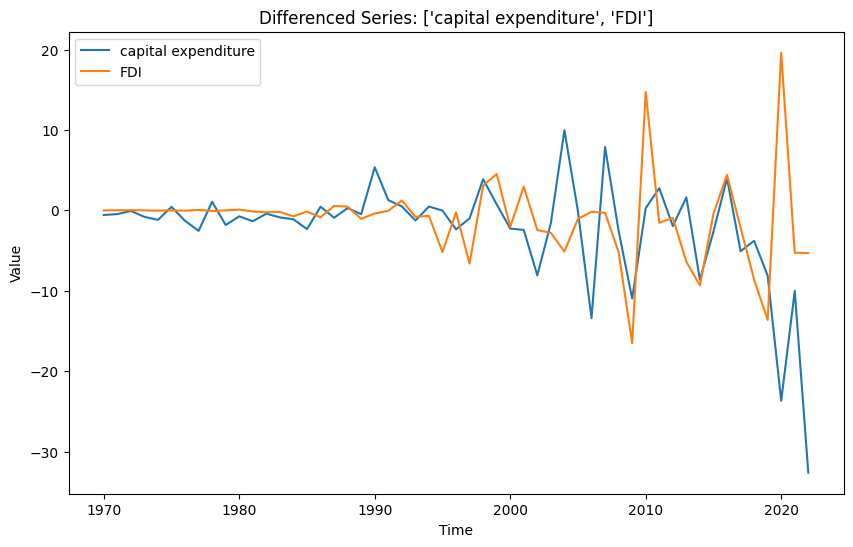

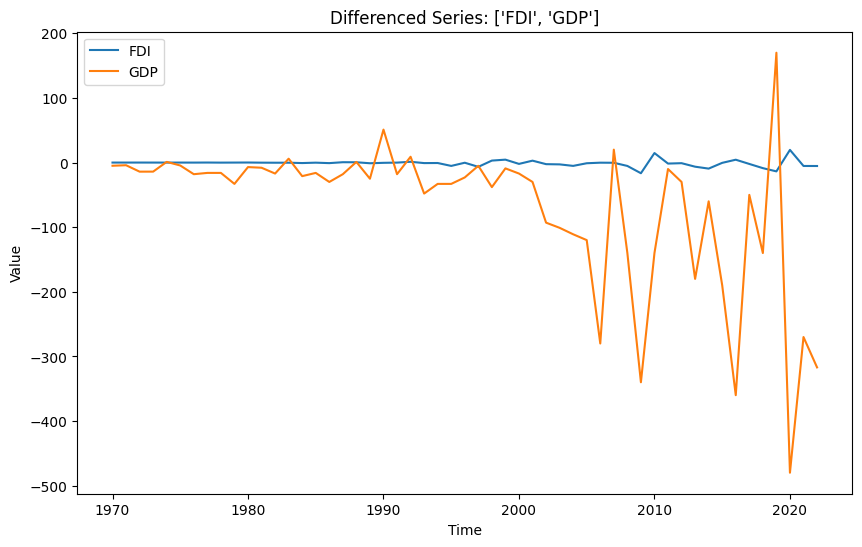

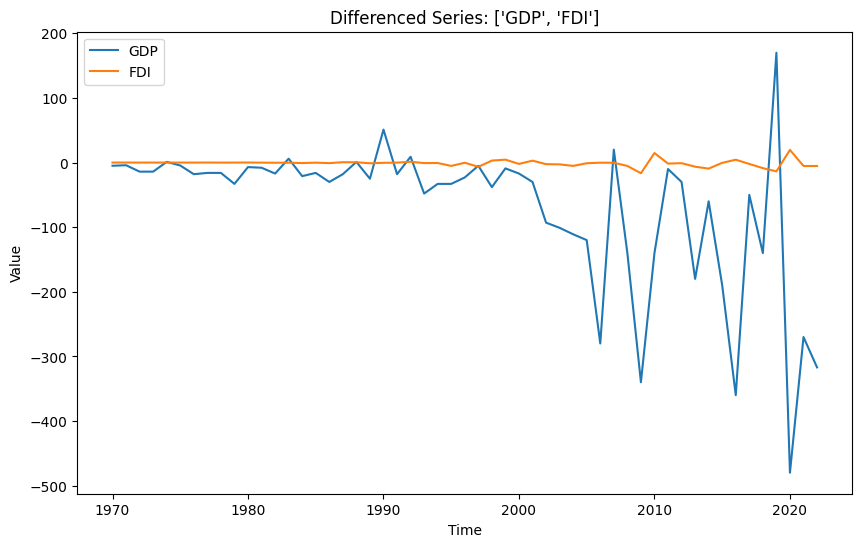

In [82]:
# Plot the differenced series for each set of variables
for vars in vars_of_interest:
    df_subset = df[vars]
    df_differenced = df_subset.diff().dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(df_differenced)
    plt.title(f"Differenced Series: {vars}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(vars)
    plt.show()

In [83]:
results_table = []  # Initialize the results table here
for vars in vars_of_interest:
    gc_res = perform_granger_causality_tests(df, vars)
    for lag, res in gc_res.items():
        p_value = res[0]['ssr_ftest'][1]
        if p_value < 0.05:
            granger_causality = 'Yes'
        else:
            granger_causality = 'No'
        results_table.append({
            'Variables': ' -> '.join(vars),
            'Lag': lag,
            'p-value': p_value,
            'Granger Causality': granger_causality
        })

df_results = pd.DataFrame(results_table)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3191  , p=0.1342  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=2.4610  , p=0.1167  , df=1
likelihood ratio test: chi2=2.4046  , p=0.1210  , df=1
parameter F test:         F=2.3191  , p=0.1342  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9392  , p=0.1554  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=4.2999  , p=0.1165  , df=2
likelihood ratio test: chi2=4.1282  , p=0.1269  , df=2
parameter F test:         F=1.9392  , p=0.1554  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8540  , p=0.0482  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=9.9557  , p=0.0189  , df=3
likelihood ratio test: chi2=9.0791  , p=0.0283  , df=3
parameter F test:         F=2.8540  , p=0.0482  , df_denom=43, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.8405 , p=0.0000  , df_d

In [99]:
df_results

,Variables,Lag,p-value,Granger Causality
0,FDI -> capital expenditure,1,0.134225,No
1,FDI -> capital expenditure,2,0.155402,No
2,FDI -> capital expenditure,3,0.048198,Yes
3,FDI -> revenue expenditure,1,0.000049,Yes
4,FDI -> revenue expenditure,2,0.000572,Yes
5,FDI -> revenue expenditure,3,0.000034,Yes
6,govt debt -> FDI,1,0.743721,No
7,govt debt -> FDI,2,0.350199,No
8,govt debt -> FDI,3,0.000066,Yes
9,capital expenditure -> FDI,1,0.535759,No
